# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [233]:
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image
import plotly.express as px

In [234]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [235]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [236]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [237]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [238]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [239]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [240]:
X = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [241]:
X.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

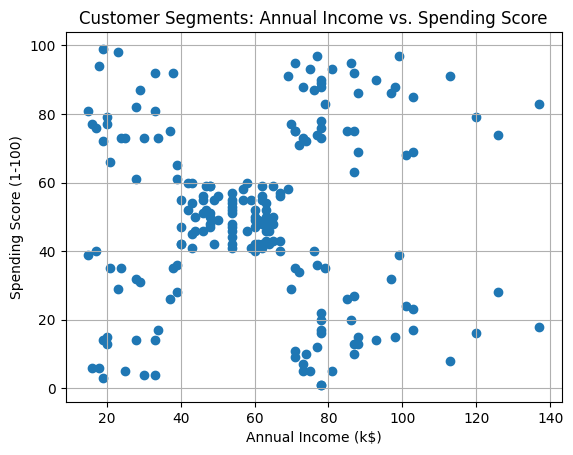

In [242]:
plt.scatter(X['AnnualIncome'], X['SpendingScore'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

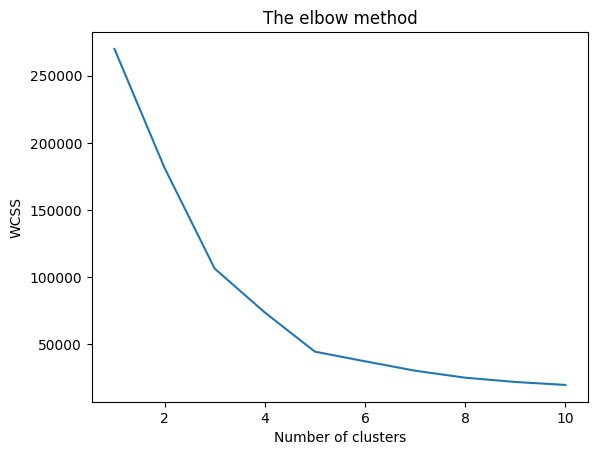

In [243]:
wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [244]:
k = 6 # Optimal K based on previous step, or chosen by user
cluster_Kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model_kmeans = cluster_Kmeans.fit(X.copy()) # Use a copy to avoid SettingWithCopyWarning
pred_kmeans = model_kmeans.labels_

# Add cluster labels to the X DataFrame
X['Cluster'] = pred_kmeans

print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

# Display first 10 labeled rows
print(X.head(10))

[5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 5 0 5 3 5 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
   AnnualIncome  SpendingScore  Cluster
0            15             39        5
1            15             81        0
2            16              6        5
3            16             77        0
4            17             40        5
5            17             76        0
6            18              6        5
7            18             94        0
8            19              3        5
9            19             72        0


/tmp/ipython-input-3178228164.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

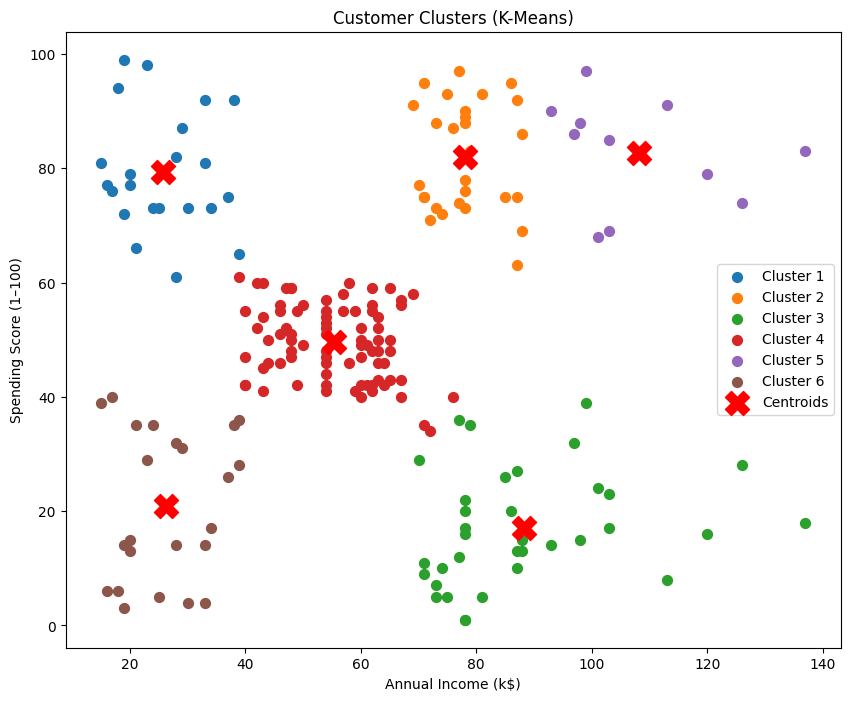

In [245]:
plt.figure(figsize=(10, 8))

# Plot each cluster separately so legend shows them individually
for i in range(model_kmeans.n_clusters):
    plt.scatter(
        X['AnnualIncome'][pred_kmeans == i],
        X['SpendingScore'][pred_kmeans == i],
        s=50,
        label=f"Cluster {i+1}"
    )

# Plot centroids
plt.scatter(
    model_kmeans.cluster_centers_[:, 0],
    model_kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title('Customer Clusters (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

  **Which cluster represents high income, low spending users?**

  Cluster 3, since the plot shows them being between 70-140 in their annual income, while their spending score is between 0-40 which are one of lowest in the clusters.

**Which cluster represents low income, high spending users?**

  Cluster 1, since the plot shows them being between 0-40 in their annual income, while their spending score is between 60-100 which is one of the highest in the clusters.

 **Which cluster might represent target customers for promotions?**

  Cluster 3, since they have the money to probably spend more in the retail shops.

  **What business insights can you derive from the clusters?**

  I think it is pretty safe to say that based from the clusters that those who are in clusters 5 and 4 would most likely be spending the most responsibly spending the right on amount depending on their income. While those in clusters 6 and 3 spend on what they need. While Clusters 1 and 2 would probably spend more on their wants.

      

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [249]:
X_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

cluster_Kmeans = KMeans(n_clusters=6)
model_kmeans = cluster_Kmeans.fit(X_3d)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

# Display first 10 labeled rows
print(X.head(10))

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 0 5 0 5 4 5 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
   AnnualIncome  SpendingScore  Cluster
0            15             39        5
1            15             81        0
2            16              6        5
3            16             77        0
4            17             40        5
5            17             76        0
6            18              6        5
7            18             94        0
8            19              3        5
9            19             72        0


Visualize using a 3D scatter plot. `(5 pts)`

In [252]:
fig = px.scatter_3d(X_3d, x='Age', y='AnnualIncome', z='SpendingScore', color = pred_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

**Are there meaningful and distinguishable clusters?**

  Yes, seperating them from those customers who are in their 20's and 30's aswell as the high, medium, and low spenders that are dependent on their annual income are clustered.





**What business insights can you derive from the clusters in 3D??**

That those who are aged 20-30 spend a lot more than those who are 40-70, this could possibly be because of less needs and wants when their older. Some of those who are 20-30 may have been starting a family and which spends a lot more or those who are 40 and above could have children that are memebers that spend for them.
